In [5]:
import pmagpy.svei as svei
import pmagpy.ipmag as ipmag
import pandas as pd
%matplotlib inline 
import os

## Before using this notebook:
- make a copy this notebook
- if you are using the  jupyterhub.earthref.org site
    - Open the link: PmagPy Online-Setup.ipynb
    - scroll down and click on the cell: !pip install pmagpy --user --upgrade
    - then scroll down and click on the next cell.
- under File, click on Open
    - click on the link to PmagPy-Online 
    - click on SVEI_demo.ipynb (this notebook)
    - click on each cell in turn

## The code used in this notebook is described in the following paper
- cite as: 
    - Tauxe, L.,  Heslop, D., and Gilder, S., Testing paleomagnetic directional distributions against field models for the averaging of secular variation and correcting for inclination shallowing using an updated elongation/inclination approach (SVEI), Journal of Geophysical Research, 25, e2024JB029502,  2024.

- URL: dx.doi.org/10.1029/2024JB029502

## How to use the SVEI module 
- testing PSV data sets against a GGP model
    - GGP models are 'Giant Gaussian Process' models for a statistical description of the  geomagnetic field (see Constable and Parker, 1988, https://doi.org/10.1002/jgrb.v93.b10)
    - SVEI uses the THG24 field model, but other published models are also available. 
- for correction of inclination shallowing of sedimentary records
    - inclinations have frequently been corrected using the E/I method described by Tauxe and Kent (2004; https://doi.org/10.1029/145gm08)
    - Tauxe et al. (2024, https://doi.org/10.1029/2024JB029502) presented an updated approach, referred to as the SVEI method
    - this notebook illustrates how to use the PmagPy code for the SVEI module
    
- You might find the PmagPy_introduction and PmagPy_MagIC notebooks helpful. 

## How to use the SVEI module of PmagPy to test if a data set represents paleosecular variation (PSV)
- create a synthetic dataset from a chosen GGP model and test using svei.svei_test()
- download the PSV10-24 data compilation from the MagIC database
- select a study and GGP model for comparison
- run svei.svei_test_varkap() for testing

## SVEI in a nutshell
- the E/I method used two parameters to characterize directional data (elongation, E, and inclination, I) and compared them to the GGP model TK03.
- Tauxe et al., 2024 defined a new GGP model, THG24 to describe global secular variation behavior.
- Tauxe et al., 2024 also defined three new parameters (A2D, A2I, V2dec) and also use E for comparison with any of the six GGP models already defined. 
- A2D and A2I are Anderson-Darling tests of the declinations and inclinations respectively.  Are the empirical and model CDFs compatible at the 95% level of confidence? (see paper for details) 
- V2dec is the declination of the minor eigenvector (V$_2$) of the empirical or simulated data set.  For lower latitudes, this is expected to be close to 180 (see Tauxe and Kent, 2004). 
- E is the elongation, defined as the ratio of the eigenvalues $\tau_2/\tau_3$ of the empirical or simulated data.  
- Compatibility of V2dec and E is determined by comparing the empirical values with the 95% bounds  of simulated values from the chosen GGP model.  

## Example of the two Anderson-Darling tests (A2D,A2I), and the V2dec, and E tests for consistency of a dataset with the THG24 GGP model

- Step 1:
    - Specify a latitude, lat, for generating a synthetic data set (here we use 30).
    - Specify the number of points, N, desired (here we use 100)
    - Choose a GGP model (here we use THG24)
    - call the function svei.GGPmodels() to get the model parameters in the GGPmodel dictionary
- Step 2:
    - call the function svei. GGPrand() to draw N directions from the model. These are returned as the declination, inclination array, assigned to di_block in the following. 
    - call the function svei.svei_test with di_block as input.


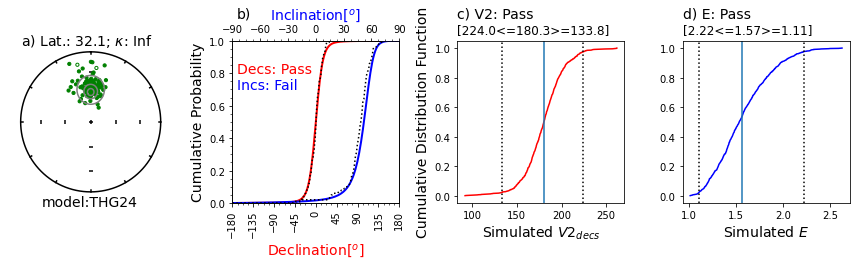

In [2]:
# generate synthetic data set with given GGP model
lat,N,model_name=30,100,'THG24'
# get the model definition
GGPmodel=svei.GGPmodels(model=model_name) 
# see the model definition:
# draw N declinations and inclinations from the model
di_block=svei.GGPrand(GGPmodel,lat,N)
result=svei.svei_test(di_block,plot=True,model_name=model_name)


Figure Caption: 
a) Equal area projection of simulated directions drawn from the  model for a  latitude of ~30. Solid symbols are lower hemispheric projections.  Grey contours are the probability densities for directions expected from the model.  The latitude (Lat) listed above the stereonet was calculated from the data based on the average inclination. An infinite kappa implies no uncertainty in the directions. 

b) Empirical cumulative distribution functions (ECDFs) from data drawn from the THG24 model plotted against the  predicted cumulative density functions (CDFs). Solid lines are the CDFs generated by the model for the declinations (red) and inclinations (blue) at the specified latitude and the dotted lines are the ECDFs of the data.  

c) V2decs from the data (solid vertical line) compared to CDF of 1000 simulated datasets drawn from THG24 (red line) at the same latitude as in a). Bounds containing 95% of the simulated data are shown as dotted vertical lines.  The note, e.g., \[221.6<=185.0>=130.4\] is the maximum 95% confidence bound, the V2dec of the data and the minimum 95% confidence bound.  Results will vary!

d) Same as c), but for the elongations (E) of the data (solid vertical line) and the simulations (solid blue line). 

This example will pass all four tests ~95% of the time.

## download and unpack MagIC contribution for PSV10-24
- The Private contribution for PSV10-24 compilation is magic_id is:'20079' and the share_key is: '716ade67-ef46-43bf-8f70-99c7082871f4' 
    - NB:  This will change to a public contribution on publication of this paper
- download the contribution with ipmag.download_magic_from_id()
    - the directory PSV10-24 will be created if it does not already exist.
    - the downloaded file will be put into the  PSV10-24 directory
- use ipmag.download_magic() to unpack it
- run the svei.py module functions to see if the data represent PSV
    - read in the site level data for a particular study
        - Quidelleur et al., 2009 (passes)
        - Calvo-Rathert et al., 2009 (fails)
    - create the di_block array
    - run svei.svei_test_varkap()

In [3]:
reference_doi: '10.1029/2024JB029502'
dir_path='PSV10-24/'
magic_contribution='magic_contribution.txt'
if False: # Turn to True when data set is published
    ipmag.download_magic_from_doi(reference_doi)
    os.rename(magic_contribution, dir_path+'/'+magic_contribution) # move to PSV10-24 directory
    ipmag.download_magic(magic_contribution,input_dir_path=dir_path,dir_path=dir_path,print_progress=False) 


### Same as first figure but for a dataset from PSV10-24 Quidelleur et al., (2009), using model THG24. 
This data set was deemed compatible with the model.

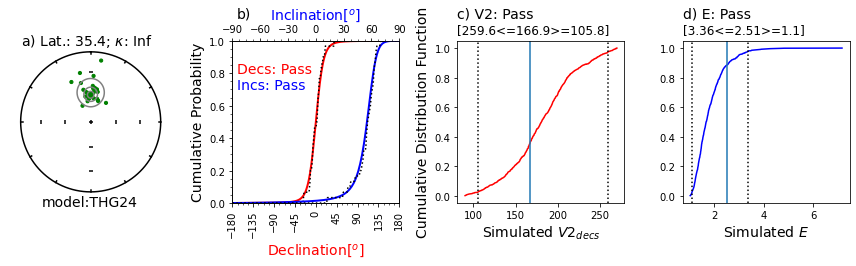

In [6]:
dir_path='PSV10-24'
example_data_doi='10.1016/j.pepi.2008.09.012'# data of Quidelleur et al, 2009)
# read in MagIC formatted PSV10-24 data compilation
df=pd.read_csv(dir_path+'/sites.txt',sep='\t',header=1)
# pick out desired example
df=df[df['citations'].str.contains(example_data_doi)]
# use svei.svei_test to see if consistent with data model
# first pick out the directional data and put in array
di_block=df[['dir_dec','dir_inc']].values
# do the test and make the plot
resdict=svei.svei_test_varkap(di_block,plot=True)


## Illustration of svei.svei_test_varkap( )
- The program first tries with no scatter in the directional data (kappa is infinite, represented by kappa=-1.  
- When that fails one or more tests, it tries with a kappa of 100. 
- Failing that, it tries a kappa of 50. 
- This data set failed the A2D compatibility test, even using a kappa of 50.
- In this case, the data are just too scattered.  
- Other data sets can be made to pass using filtering of data for quality using, e.g., MAD at the specimen level or a site level kappa if there are multiple samples per site. 

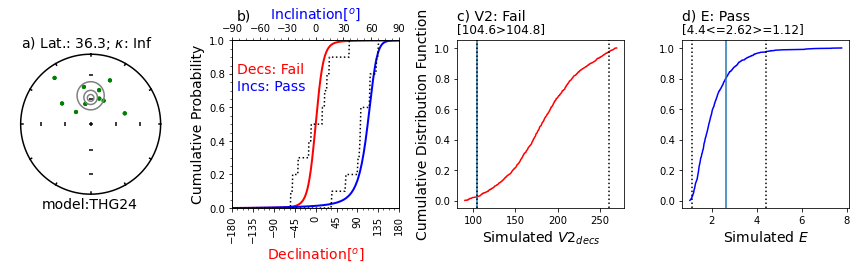

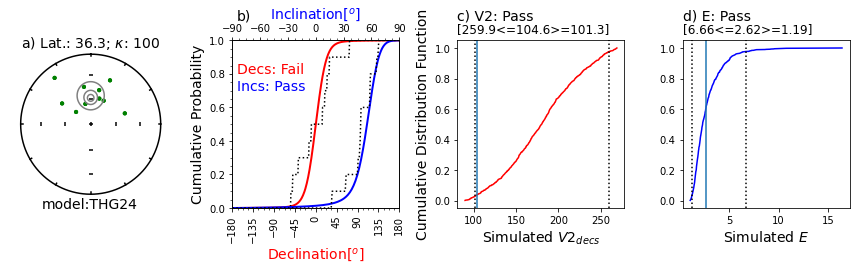

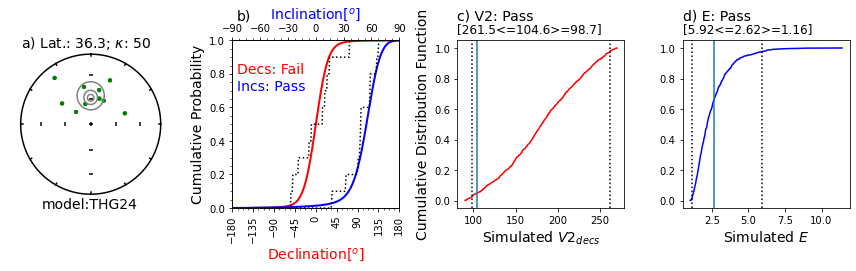

In [10]:
# here's one that fails the compatibility test:
example_data_doi='10.1186/BF03352885'# data of Calvo-Rathert et al., 2009)
# read in MagIC formatted PSV10-24 data compilation
df=pd.read_csv(dir_path+'/sites.txt',sep='\t',header=1)
# pick out desired example
df=df[df['citations'].str.contains(example_data_doi)]
# use svei.svei_test to see if consistent with data model
# first pick out the directional data and put in array
di_block=df[['dir_dec','dir_inc']].values
# do the test and make the plot
resdict=svei.svei_test_varkap(di_block,plot=True)


## Use svei.py module to correct inclination shallowing
- create directory for example data set
- download data set of Gilder et al., 2001 (doi: 10.1029/2001JB000325)
- These data were filtered for MAD<10 prior to contributing to the MagIC database
- perform a reversals test
- run svei.find_flat()


In [11]:
# download data from MagIC
dir_path='find_flat'
dirs=os.listdir()
if dir_path not in dirs:
    os.mkdir(dir_path) # create directory if needed
else:
    print (dir_path + ' already created')

reference_doi = '10.1029/2001JB000325'
magic_contribution='magic_contribution.txt' # default filename for downloaded file
ipmag.download_magic_from_doi(reference_doi)
os.rename(magic_contribution, dir_path+'/'+magic_contribution) # move to dir_path
# unpack the file
ipmag.download_magic(magic_contribution,dir_path=dir_path,print_progress=False)

20098/magic_contribution_20098.txt extracted to magic_contribution.txt 

1  records written to file  /Users/ltauxe/PmagPy/find_flat/contribution.txt
1  records written to file  /Users/ltauxe/PmagPy/find_flat/locations.txt
222  records written to file  /Users/ltauxe/PmagPy/find_flat/sites.txt
222  records written to file  /Users/ltauxe/PmagPy/find_flat/samples.txt
222  records written to file  /Users/ltauxe/PmagPy/find_flat/specimens.txt


True

## Be patient - these simulations can take a while....

Heslop et al. (2023) test statistic value = 9.65
Heslop et al. (2023) critical test statistic value = 12.59
Estimated p-value = 0.10
Cannot reject null of common means at alpha = 0.05 confidence level


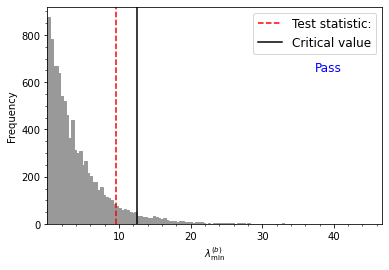

(1, 9.647524624224388, 12.585427382469646, 0.09529047095290472)

In [12]:
# read specimen level data from publication
dir_path='find_flat'
df=pd.read_csv(dir_path+'/specimens.txt',sep='\t', header=1)
# filter for maximum angle of deviation less than 10 degrees 
df=df[df['dir_mad_free']<=10] # NB: this was already done, but here you find out how
# first pick out the directional data and put in array
di_block=df[['dir_dec','dir_inc']].values
# do the reversals test of Heslop et al. (2023)
result=ipmag.reversal_test_bootstrap_H23(di_block=di_block,plot=True)


## Next steps:
- if data pass the reversals test, then do this:
- try 'quick' version first: 
- the function svei.find_flat()  first tests if data are compatible with GGP model with svei.svei_test() as in an example above. 
- if the data are not compatible, then you don't try unflattening them.  Mission aborted!
- if they are the program continues with the unflattening procedure.   


using model:  THG24


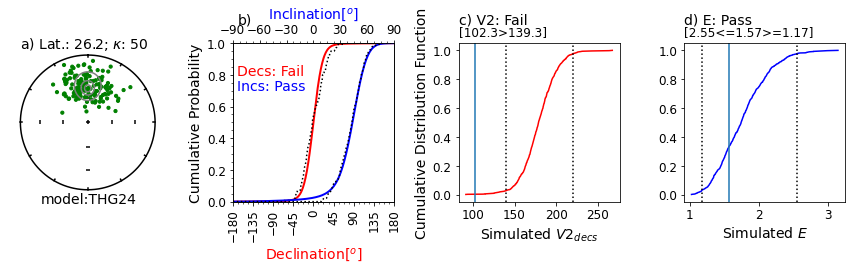

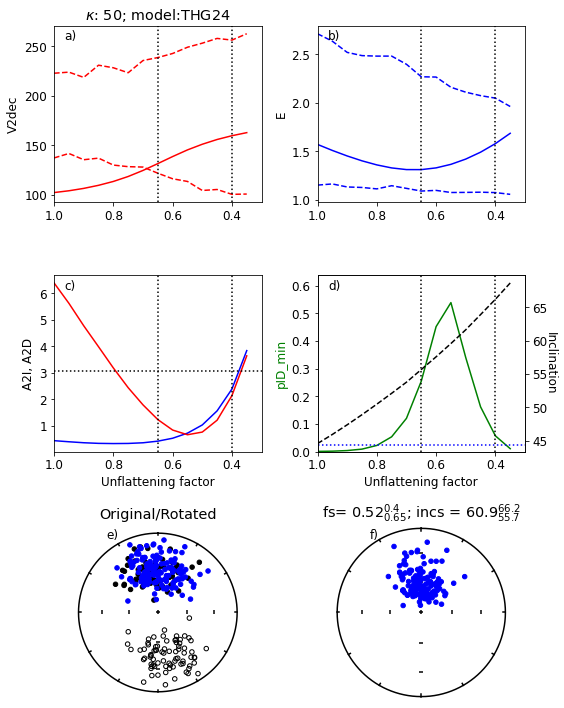

In [13]:
quick=True
if quick: # not exactly quick but quicker than not quick...  
    flat_df=svei.find_flat(di_block,plot=True,quick=quick)
    # then the full way (much slower, but way better)


Figure Caption

a) Range of values of V2dec for a range of unflattening factors, f.  Empirical data are the solid red line and the bounds for the simulated data are red dashed lines.  The dotted vertical lines are the bounds for which all four paramters 'pass'.  The kappa used was 50 and the GGP model was THG24.  

b) Same as a) but for the elongation, E. 

c) A2I (blue)  and A2D (red) for data after applying unflattening factor. Horizontal dotted line is at 3.07, below which the data are compatible with the model.  

d) green line: pID_min values (see paper for definition)  for data. dashed black line: inclination of data after applying  unflattening factor.  

e) Black symbols: Original data set. Blue symbols: after rotation and flipping of reverse directions to antipodes

f) Data after "correction" using the optimum value of f. 


## Results from the above experiment
- The program tested the data against the chosen model and finds that the V2dec criterion fails
- The program then runs through a series of values of the unflattening factor, f.  
- For this data set, it finds the optimum value of f (0.52) ranging from 0.4 to 0.65.
- The corresponding inclination is $\sim$61. Your results may vary (a little)



using model:  THG24


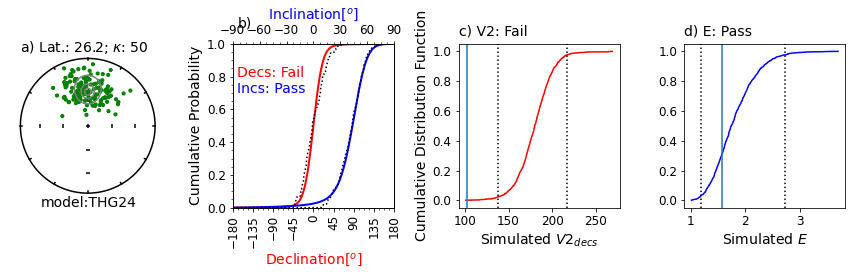

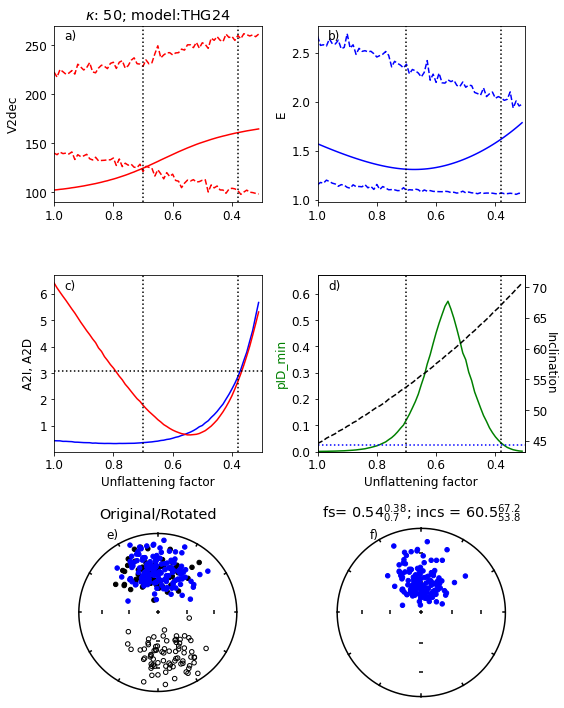

In [13]:
# if 'quick' results are promising, do the full way
# this is slower, but much more reliable and gives better confidence bounds
quick=False
verbose=False # if you want to see progress at every step, then choose True
flat_df=svei.find_flat(di_block,plot=True,quick=quick,verbose=verbose)



## Same caption as before